# Assignment 0: Conical tank emptying time

Let's calculate how long it takes to [empty a conical tank](https://www.youtube.com/watch?v=2jQ1jA8uJuU)

The simplification of the continuity equation leads, for a generic $h$, to

$$
u_1 D_h^2 = u_1 \left(d + 2h \tan \theta \right)^2 = u_2 d^2 \tag{1}
$$

$$
\Rightarrow \; u_2 = u_1\left(1 + 2\frac{h}{d} \tan \theta \right)^2 \tag{2}
$$

On the other hand, Bernoulli's equation, considering quasi-steady flow and without viscosity,

$$
u_1^2 + 2gh = u_2^2 = u_1^2 \left(1 + 2\frac{h}{d} \tan \theta \right)^4 \tag{3}
$$

$$
\Rightarrow \; u_1^2 \left[ \left(1 + 2\frac{h}{d} \tan \theta \right)^4 -1 \right] = 2gh \tag{4}
$$

$$
\Rightarrow \; u_1 = \left[ \frac{2gh}{\left(1 + 2\frac{h}{d} \tan \theta \right)^4 -1} \right]^\frac{1}{2} = -\frac{\textrm{d} h}{\textrm{d} t} \tag{5}
$$

$$
\Rightarrow \; \boxed{dt = - \left[ \frac{\left(1 + 2\frac{h}{d} \tan \theta \right)^4 -1}{2gh}\right]^\frac{1} {2} \textrm{d} h} \label{eq:int} \tag{6}
$$

This can be written dimensionless with a time characteristic $\tau = \sqrt{\frac{d}{2g}}$, a change to dimensionless variable $\xi = \frac{h}{d}$, and a parameter $A = 2\tan \theta$, becoming

$$
\frac{\textrm{d} t}{\tau} = - \left[ \frac{\left(1 + A \xi \right)^4 -1}{\xi}\right]^\frac{1 }{2} \textrm{d} \xi \tag{7}
$$

Use sympy to analytically compute this time, making an estimation with  $d \ll h$ so that it can be supposed that  $\xi \gg 1$.

## Solution

First of all, the `sympy` library is imported. If it fails to do so, the `sympy` library is installed in its 1.7.1 version.

In [1]:
try:
    import sympy as sp
except:
    !pip install sympy==1.7.1
    import sympy as sp

Next, the estimation $d \ll h$ that leads to $\xi \gg 1$ is applied to Equation `7`:
$$
(1+A\xi)^4-1\hspace{0.5cm}\rightarrow\hspace{0.5cm}(1+A\xi)^4
$$

With that, the differential equation to be solved is the following:
$$
\frac{\textrm{d} t}{\tau} = - \left[ \frac{\left(1 + A \xi \right)^4 }{\xi}\right]^\frac{1 }{2} \textrm{d} \xi \tag{8}
$$

Solving for the time needed to empty the conical tank $t_{empty}$:
$$
t_{empty} = \int_0^{t_{empty}} \textrm{d}t = -\tau\int_{\xi_i}^{\xi_f}\left[ \frac{\left(1 + A \xi \right)^4 }{\xi}\right]^\frac{1 }{2} \textrm{d} \xi \tag{9}
$$

Where at $t=0$ the initial condition is $\xi_i = \frac{h_i}{d}$, and at the end ($t=t_{empty}$) the final condition is $\xi_f = \frac{h_f}{d} = \frac{0}{d} = 0$.

The integral of the right-hand side of Equation `9` can be solved analytically using `sympy`.

First of all, the symbols to be used are declared:

In [2]:
sp.init_printing()
xi,A,xii,xif,tau,tempty = sp.symbols('xi,A,xi_i,xi_f,tau,t_{empty}',positive=True,real=True)

Then, the expression to integrate is defined:

In [3]:
expr = sp.sqrt((1+A*xi)**4/xi)
display(expr)

And finally, the expression is integrated from $\xi_i$ to $\xi_f$:

In [4]:
sol_int = expr.integrate((xi,xii,xif))
display(sol_int)

According to Equation `9`, the time it takes to empty a conical tank is:

In [5]:
sol = sp.Eq(tempty,-tau*sol_int)
display(sol)

And knowing that $\xi_f = 0$, it becomes:

In [6]:
sol = sol.replace(xif,0)
display(sol)

Simplifying:

In [7]:
sol = sol.simplify()
display(sol)

Finally, replacing the parameters $\tau = \sqrt{\frac{d}{2g}}$, $\xi_i = \frac{h_i}{d}$ and $A = 2\tan{\theta}$, the final expression for the time is obtained:

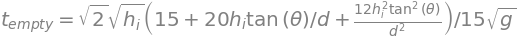

In [8]:
theta,d,g,hi = sp.symbols('theta,d,g,h_i',positive=True,real=True)
sol = sol.replace(tau,sp.sqrt(d/(2*g)))
sol = sol.replace(xii,hi/d)
sol = sol.replace(A,2*sp.tan(theta))
display(sol)

### Numerical case

For a cone of 1m of height, an angle of 15º and a bottom hole of 3cm of diameter, the next data can be defined: $h_i = 1\:m$, $\theta = 15º$, $d = 3\:cm = 0.03\:m$ and $g = 9.81\:m/s^2$.

Replacing these values in the last expression, the time it takes to empty the cone is (in seconds):

In [9]:
try:
    import numpy as np
except:
    !pip install numpy
    import numpy as np

num_sol = sp.lambdify((hi,theta,d,g),sol.rhs)
num_sol(1,15*np.pi/180,0.03,9.81)